# Data Processing Functions

create dictionaries to convert between numbers and words

In [1]:
from keras.datasets import imdb

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

Using TensorFlow backend.


define functions to switch between text, word lists, vectors, and arrays of vectors

In [56]:
import string

def string_to_number_list(input_string):
    no_punc = input_string.translate(str.maketrans(' ', ' ', string.punctuation)).lower()
    word_list = no_punc.split()
    
    number_list = []
    for word in word_list:
        word_number = word_index.get(word,None)
        if word_number and word_number <= 10000:
            number_list.append(word_number)
        elif word_number:
            print(word, ' is in the dictionary but was not used for training the model')
        else:
            print(word, ' is not in the dictionary and was not used to train the model')
    return number_list

In [3]:
def number_list_to_string(number_list):
    return ' '.join([reverse_word_index[word_number] for word_number in number_list])

In [4]:
import numpy as np

def number_list_array_to_vector_array(reviews, dimension = 10000):
    results = np.zeros((len(reviews), dimension)) # number of training reviews x number of possible words
    for index, review in enumerate(reviews):
        results[index, review] = 1
    return results

In [5]:
def vector_to_word_list(vector):
    word_list = []
    for word_number, boolean in enumerate(vector):
        if boolean:
            word_list.append(reverse_word_index[word_number])
    return word_list

In [6]:
# def make_test_data(string):
def string_to_vector_array(string):    
    return np.array(number_list_array_to_vector_array([string_to_number_list(string)]))

# Download Data, Dev/Test Split

In [7]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [8]:
x_train = number_list_array_to_vector_array(train_data)
x_test = number_list_array_to_vector_array(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print('x_train')
print(x_train)
print()
print('y_train')
print(y_train)

x_train
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]

y_train
[1. 0. 0. ... 0. 1. 0.]


# Define Neural Network

In [176]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

model = models.Sequential()
model.add(layers.Dense(10000, activation = 'relu', input_shape = (10000,)))

model.add(layers.Dense(2000, activation = 'relu'))
model.add(layers.Dense(2000, activation = 'relu'))

model.add(layers.Dense(500, activation = 'relu'))
model.add(layers.Dense(500, activation = 'relu'))

model.add(layers.Dense(250, activation = 'relu'))
model.add(layers.Dense(250, activation = 'relu'))

model.add(layers.Dense(125, activation = 'relu'))
model.add(layers.Dense(125, activation = 'relu'))

model.add(layers.Dense(50, activation = 'relu'))
model.add(layers.Dense(50, activation = 'relu'))

model.add(layers.Dense(25, activation = 'relu'))
model.add(layers.Dense(25, activation = 'relu'))

model.add(layers.Dense(10, activation = 'relu'))
model.add(layers.Dense(10, activation = 'relu'))

model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
             loss = losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

# Train Network

In [177]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=6,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/6
15000/15000 [==============================] - 124s 8ms/step - loss: 0.7247 - acc: 0.5062 - val_loss: 0.6932 - val_acc: 0.4966
Epoch 2/6
15000/15000 [==============================] - 120s 8ms/step - loss: 0.6974 - acc: 0.6091 - val_loss: 0.5342 - val_acc: 0.8078
Epoch 3/6
15000/15000 [==============================] - 119s 8ms/step - loss: 0.4289 - acc: 0.8434 - val_loss: 0.3823 - val_acc: 0.8203
Epoch 4/6
15000/15000 [==============================] - 120s 8ms/step - loss: 0.2478 - acc: 0.9125 - val_loss: 0.4398 - val_acc: 0.8076
Epoch 5/6
15000/15000 [==============================] - 119s 8ms/step - loss: 0.1488 - acc: 0.9521 - val_loss: 0.4213 - val_acc: 0.8792
Epoch 6/6
15000/15000 [==============================] - 119s 8ms/step - loss: 0.0925 - acc: 0.9714 - val_loss: 0.6077 - val_acc: 0.8849


# Analyze Results

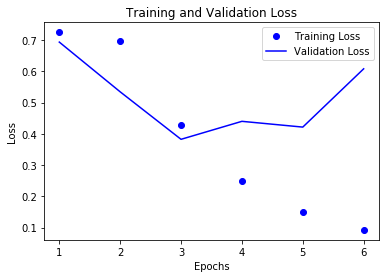

In [178]:
import matplotlib.pyplot as plt

history_dict = history.history

epochs = range(1, len(history_dict['val_loss']) +1)
plt.plot(epochs, history_dict['loss'], 'bo', label = 'Training Loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [179]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 80s 3ms/step


[0.6464387044537068, 0.87412]

# Custom Tests

### Custom Test Function

In [180]:
def custom_test(string,boolean):
    percent = model.predict(string_to_vector_array(string))[0][0]
    
    if percent > .5 and boolean:
        accuracy = 'CORRECT'
    elif percent > .5 and not boolean:
        accuracy = 'WRONG'
    elif percent < .5 and boolean:
        accuracy = 'WRONG'
    elif percent < .5 and not boolean:
        accuracy = 'CORRECT'
        
    if boolean:
        sentiment = 'positive'
    else:
        sentiment = 'negative'
        
    print(accuracy, 'Model predicted', percent, 'chance of being positive.')
    

### Positive Reviews

In [181]:
custom_test('wow this movie was incredible', True)

CORRECT Model predicted 0.9605966 chance of being positive.


In [182]:
custom_test('love favorite best great incredible interesting', True)

CORRECT Model predicted 0.8427976 chance of being positive.


In [183]:
custom_test('wow! I have never even seen a movie this good! it was better than the godfather', True)

CORRECT Model predicted 0.7664375 chance of being positive.


In [184]:
custom_test('the plot was quick-paced and easily entertained me and I loved the character development', True)

quickpaced  is not in the dictionary and was not used to train the model
CORRECT Model predicted 0.9830367 chance of being positive.


### Negative Reviews

In [185]:
custom_test('this was a terrible movie, i really hated it and thought it was the worst', False)

WRONG Model predicted 0.950732 chance of being positive.


In [186]:
custom_test('this is easily the worst movie that I have every watched in my entire life', False)

CORRECT Model predicted 0.3095378 chance of being positive.


In [187]:
custom_test('I would rather scratch and gouge my own eyes out than be forced to watch this movie', False)

gouge  is in the dictionary but was not used for training the model
CORRECT Model predicted 0.18765962 chance of being positive.


In [188]:
custom_test('the characters were flat an uninteresting and the plot dragged on forever', False)

CORRECT Model predicted 0.12461313 chance of being positive.


In [189]:
custom_test('boring, terrible, worst, hate, awful', False)

WRONG Model predicted 0.55204403 chance of being positive.
